# 3 points in 2D with Delaunay

In [1]:
import lindelint as ldi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lbox=10

n_vertices = 4
max_module = 2.0

vertices = np.random.uniform(-lbox+max_module, lbox-max_module, (n_vertices, 2))
v_vertices = np.random.uniform(-1, 1, (n_vertices, 2))
v_vertices = max_module*v_vertices/np.linalg.norm(np.ravel(v_vertices))

In [3]:
interpolator = ldi.Interpolator(vertices, v_vertices)

In [4]:
n_points = 500
points = np.random.uniform(-10, 10, (n_points, 2))

In [5]:
v_points = interpolator.do_your_thing(points)

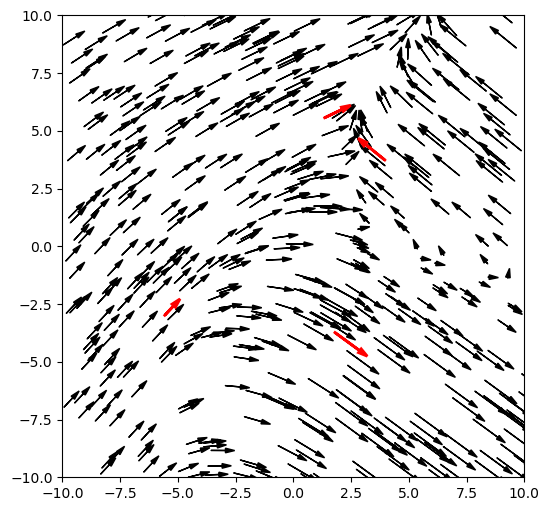

In [6]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
        head_width=0.2, head_length=0.4, fc='k', ec='k')
    
for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r', lw=2.0)

    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()

In [7]:
interpolator.delaunay.find_simplex([[0,-10], [10,0]])

array([-1, -1], dtype=int32)

In [ ]:
{ii:[] for ii in range(3)}

In [ ]:
[-1, -1, 2, 0, 1]

In [ ]:
for ii,jj in interpolator._convex_hull_simplices.items():
    print(ii, jj)

In [ ]:
interpolator.delaunay.simplices[0]

In [ ]:
aa = list(interpolator.delaunay.convex_hull)

In [ ]:
aa.pop(0)

In [ ]:
np.all(np.isin([0,1], [0,1,2]))

In [ ]:
interpolator.delaunay.neighbors

In [ ]:
interpolator.delaunay.neighbors

In [ ]:
interpolator.delaunay.simplices

In [ ]:
np.zeros(3, dtype=bool)

In [ ]:
for ii in interpolator.delaunay.convex_hull:
    
    

In [ ]:
_, closest_point_index = interpolator._kdtree.query([0,-10])

In [ ]:
closest_point_index

In [ ]:
interpolator.delaunay.vertex_to_simplex

In [ ]:
interpolator.delaunay.convex_hull

In [ ]:
def barycentric_coords2(vertices, point):
    v = vertices[1]-vertices[0]
    d = np.linalg.norm(v)
    u = v/d
    p = point - vertices[0]
    f = np.dot(p, u)/d
    return 1.0-f, f

In [ ]:
all_bcoords3 = []

for ii in range(n_points):
    
    alpha, beta, gamma = barycentric_coords3(vertices, points[ii])
    all_bcoords3.append(np.array([alpha, beta, gamma]))

    if (alpha<0):
        alpha = 0.0
        beta, gamma = barycentric_coords2([vertices[1], vertices[2]], points[ii])
        if beta<0:
            beta = 0.0
            gamma = 1.0
        elif beta>1:
            beta = 1.0
            gamma = 0.0
    elif (beta<0):
        beta = 0.0
        alpha, gamma = barycentric_coords2([vertices[0], vertices[2]], points[ii])
        if alpha<0:
            alpha = 0.0
            gamma = 1.0
        elif alpha>1:
            alpha = 1.0
            gamma = 0.0
    elif (gamma<0):
        gamma = 0.0
        alpha, beta = barycentric_coords2([vertices[0], vertices[1]], points[ii])
        if alpha<0:
            alpha = 0.0
            beta = 1.0
        elif alpha>1:
            alpha = 1.0
            beta = 0.0

    v_points[ii] = alpha*v_vertices[0]+beta*v_vertices[1]+gamma*v_vertices[2]

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
        head_width=0.2, head_length=0.4, fc='k', ec='k')
    
for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r', lw=2.0)

    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()